In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.0/628.0 kB 29.6 MB/s eta 0:00:00


In [2]:
import os
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm
from shutil import copyfile
import matplotlib.pyplot as plt
from PIL import Image

import ultralytics
from ultralytics import YOLO
ultralytics.checks()

Ultralytics YOLOv8.0.133 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/78.2 GB disk)


In [3]:
import yaml

particle_yaml = dict(
    train='/content/drive/MyDrive/labels/train',
    val='/content/drive/MyDrive/labels/valid',
    test='/content/drive/MyDrive/labels/test',
    nc=1,
    names =['particle']
)

with open('particles.yaml', 'w') as outfile:
    yaml.dump(particle_yaml, outfile, default_flow_style=True)

In [4]:
model = YOLO("yolov8n.pt")

100%|██████████| 6.23M/6.23M [00:00<00:00, 143MB/s]


In [5]:
!yolo task=detect mode=train model=yolov8n.pt data=particles.yaml epochs=20 imgsz=1280

Ultralytics YOLOv8.0.133 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=particles.yaml, epochs=20, patience=50, batch=16, imgsz=1280, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, si

In [6]:
!yolo task=detect mode=val model=yolov8n.pt data=particles.yaml

Ultralytics YOLOv8.0.133 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/labels/valid.cache... 12 images, 0 backgrounds, 0 corrupt: 100% 12/12 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.40it/s]
                   all         12         52      0.382       0.25       0.39      0.213
                person         12         52      0.382       0.25       0.39      0.213
Speed: 0.2ms preprocess, 19.2ms inference, 0.0ms loss, 14.6ms postprocess per image
Results saved to runs/detect/val


In [7]:
best_path = 'runs/detect/train/weights/best.pt'
source0 = '/content/drive/MyDrive/labels/test'

In [8]:
ppaths=[]
for dirname, _, filenames in os.walk(source0):
    for filename in filenames:
        if filename[-4:]=='.jpg':
            ppaths+=[(os.path.join(dirname, filename))]
ppaths=sorted(ppaths)
print(ppaths)

['/content/drive/MyDrive/labels/test/particle_1_297.jpg', '/content/drive/MyDrive/labels/test/particle_1_340.jpg', '/content/drive/MyDrive/labels/test/particle_1_343.jpg', '/content/drive/MyDrive/labels/test/particle_1_367.jpg', '/content/drive/MyDrive/labels/test/particle_1_372.jpg']


In [9]:
model2 = YOLO(best_path)

In [10]:
!yolo task=detect mode=predict model={best_path} source={source0} conf=0.25

Ultralytics YOLOv8.0.133 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients

image 1/5 /content/drive/MyDrive/labels/test/particle_1_297.jpg: 960x1280 (no detections), 58.1ms
image 2/5 /content/drive/MyDrive/labels/test/particle_1_340.jpg: 960x1280 (no detections), 15.1ms
image 3/5 /content/drive/MyDrive/labels/test/particle_1_343.jpg: 960x1280 (no detections), 15.1ms
image 4/5 /content/drive/MyDrive/labels/test/particle_1_367.jpg: 960x1280 (no detections), 15.2ms
image 5/5 /content/drive/MyDrive/labels/test/particle_1_372.jpg: 960x1280 (no detections), 15.2ms
Speed: 5.3ms preprocess, 23.7ms inference, 3.0ms postprocess per image at shape (1, 3, 960, 1280)
Results saved to runs/detect/predict


In [11]:
results = model2.predict(source0, conf=0.25)
print(len(results))


image 1/5 /content/drive/MyDrive/labels/test/particle_1_297.jpg: 960x1280 (no detections), 51.0ms
image 2/5 /content/drive/MyDrive/labels/test/particle_1_340.jpg: 960x1280 (no detections), 15.1ms
image 3/5 /content/drive/MyDrive/labels/test/particle_1_343.jpg: 960x1280 (no detections), 15.1ms
image 4/5 /content/drive/MyDrive/labels/test/particle_1_367.jpg: 960x1280 (no detections), 15.1ms
image 5/5 /content/drive/MyDrive/labels/test/particle_1_372.jpg: 960x1280 (no detections), 15.1ms
Speed: 5.2ms preprocess, 22.3ms inference, 0.8ms postprocess per image at shape (1, 3, 960, 1280)


5


In [ ]:

PBOX=pd.DataFrame(columns=range(6))
for i in range(len(results)):
    arri=pd.DataFrame(results[i].to('cpu').boxes.boxes).astype(float)
    path=ppaths[i]
    file=path.split('/')[-1]
    arri=arri.assign(file=file)
    arri=arri.assign(i=i)
    PBOX=pd.concat([PBOX,arri],axis=0)
PBOX.columns=['x','y','x2','y2','confidence','class','file','i',]
display(PBOX)

WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.
WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.
WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.
WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.
WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


Empty DataFrame
Columns: [x, y, x2, y2, confidence, class, file, i]
Index: []

In [ ]:
def draw_box(n0):

    ipath=results[n0]
    image=ipath.orig_img

    H,W=image.shape[0],image.shape[1]
    # print(H, W)
    file=ipath.path.split('/')[-1]
    if PBOX[PBOX.file==file] is not None:
        box=PBOX[PBOX.file==file]
        print(box)
        box=box.reset_index(drop=True)
        #for i in range(len(box)):
        x0=int(box.iloc[0,0])
        y0=int(box.iloc[0,1])
        x1=int(box.iloc[0,2])
        y1=int(box.iloc[0,3])
        print(x0, y0, x1, y1)
        cv2.rectangle(image,(x0,y1),(y0,x1),(255,0,0),5) #green

    #plt.imshow(image)
    #plt.show()

    return image

In [ ]:
from google.colab.patches import cv2_imshow

In [12]:
from PIL import Image
img = Image.open('/content/runs/detect/train/val_batch0_pred.jpg')

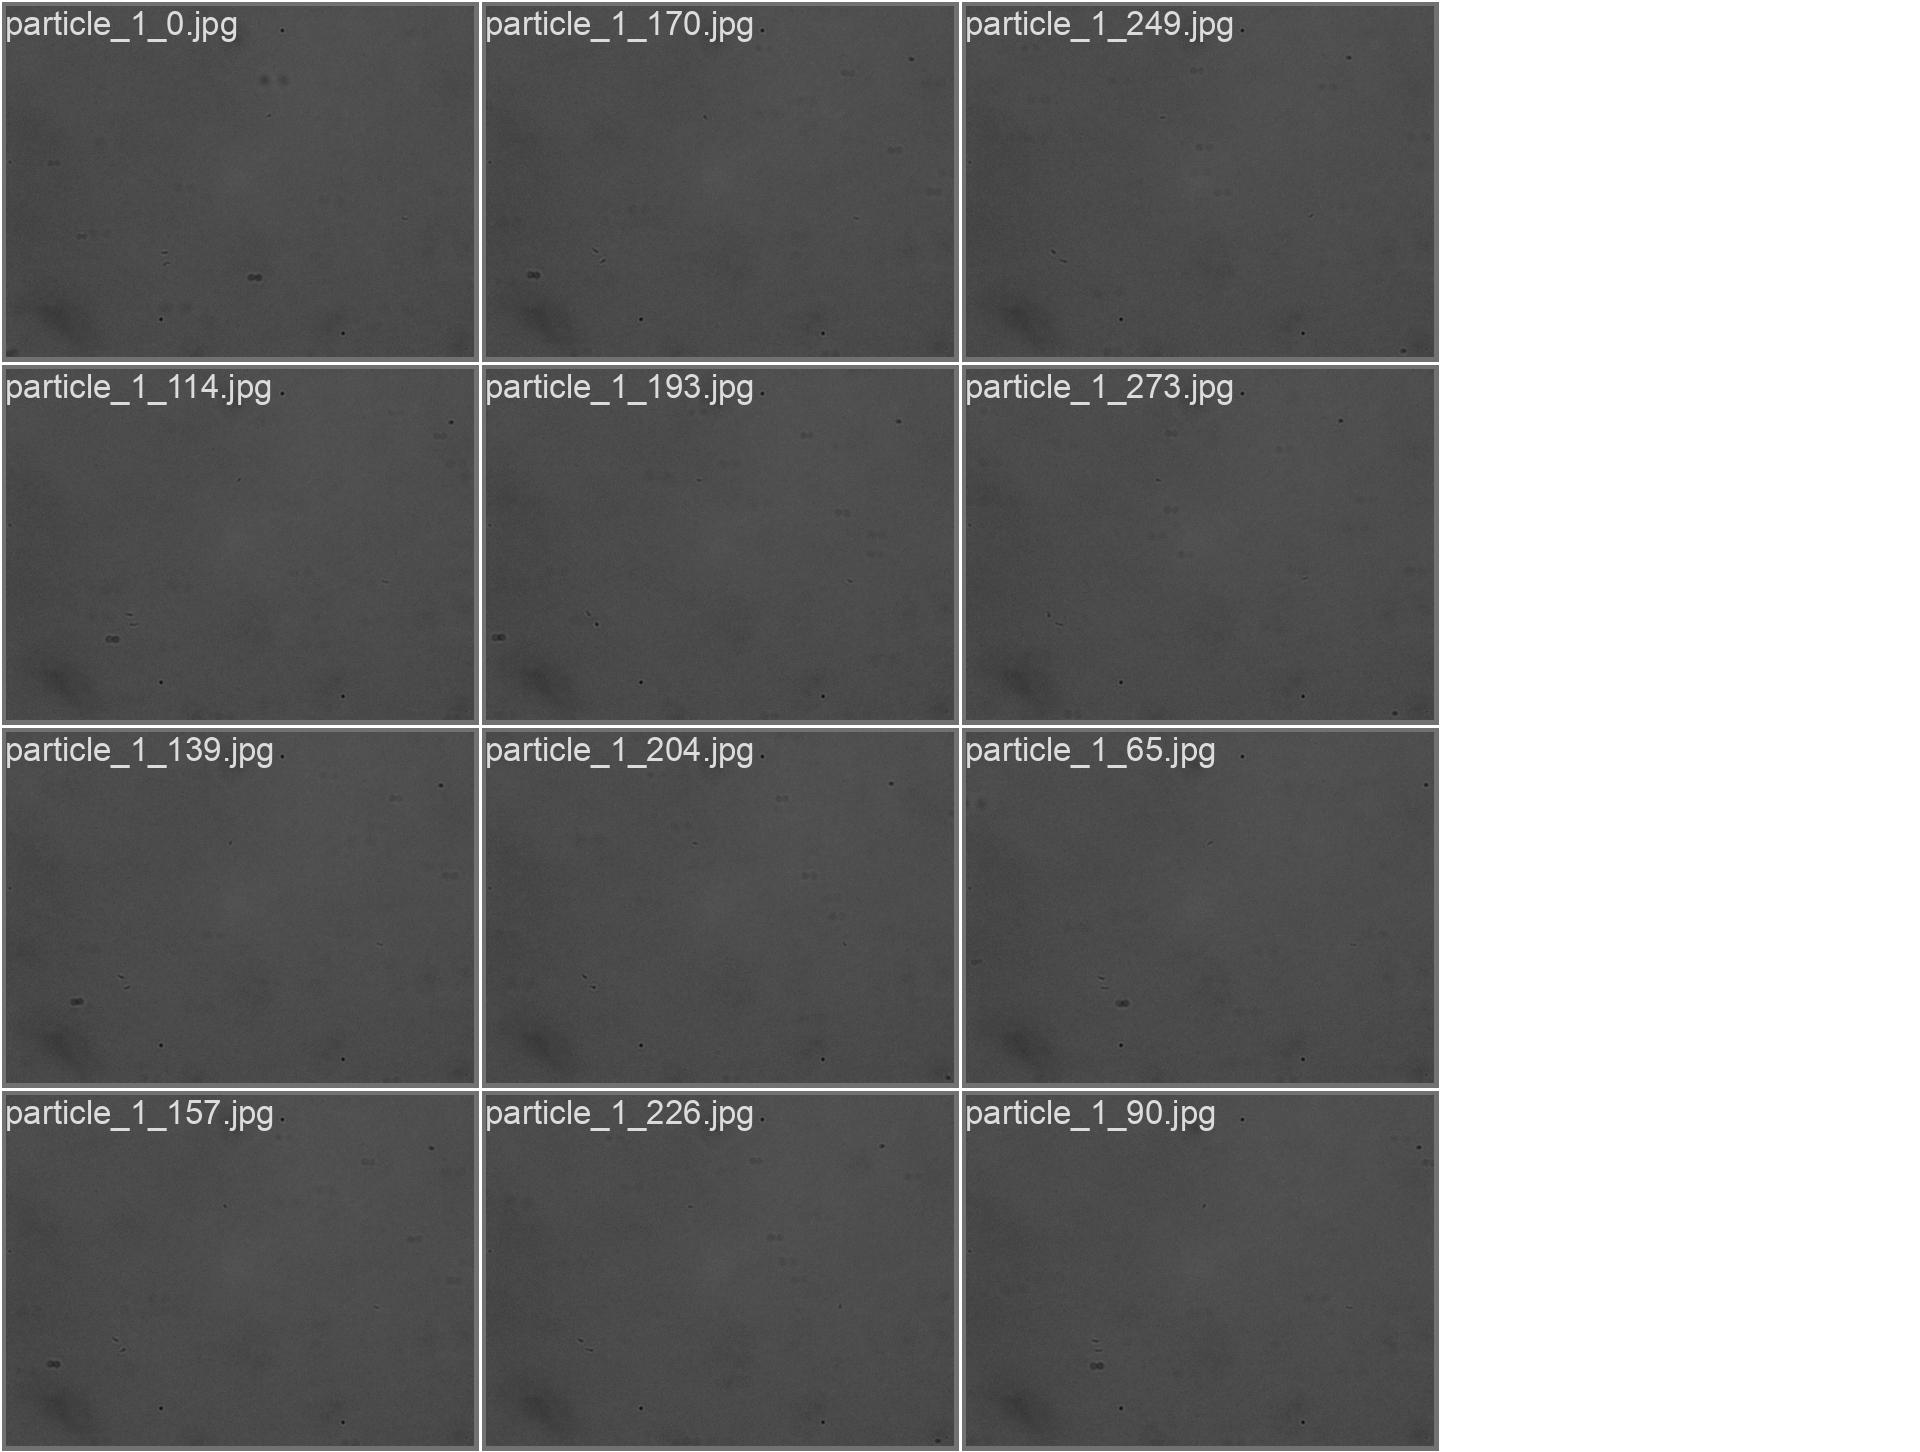

In [13]:
img.show()

In [14]:
img1 = Image.open('/content/runs/detect/val/val_batch0_pred.jpg')

In [15]:
img1.show()

In [ ]:
img2 = Image.open('/content/runs/detect/train2/val_batch0_pred.jpg')

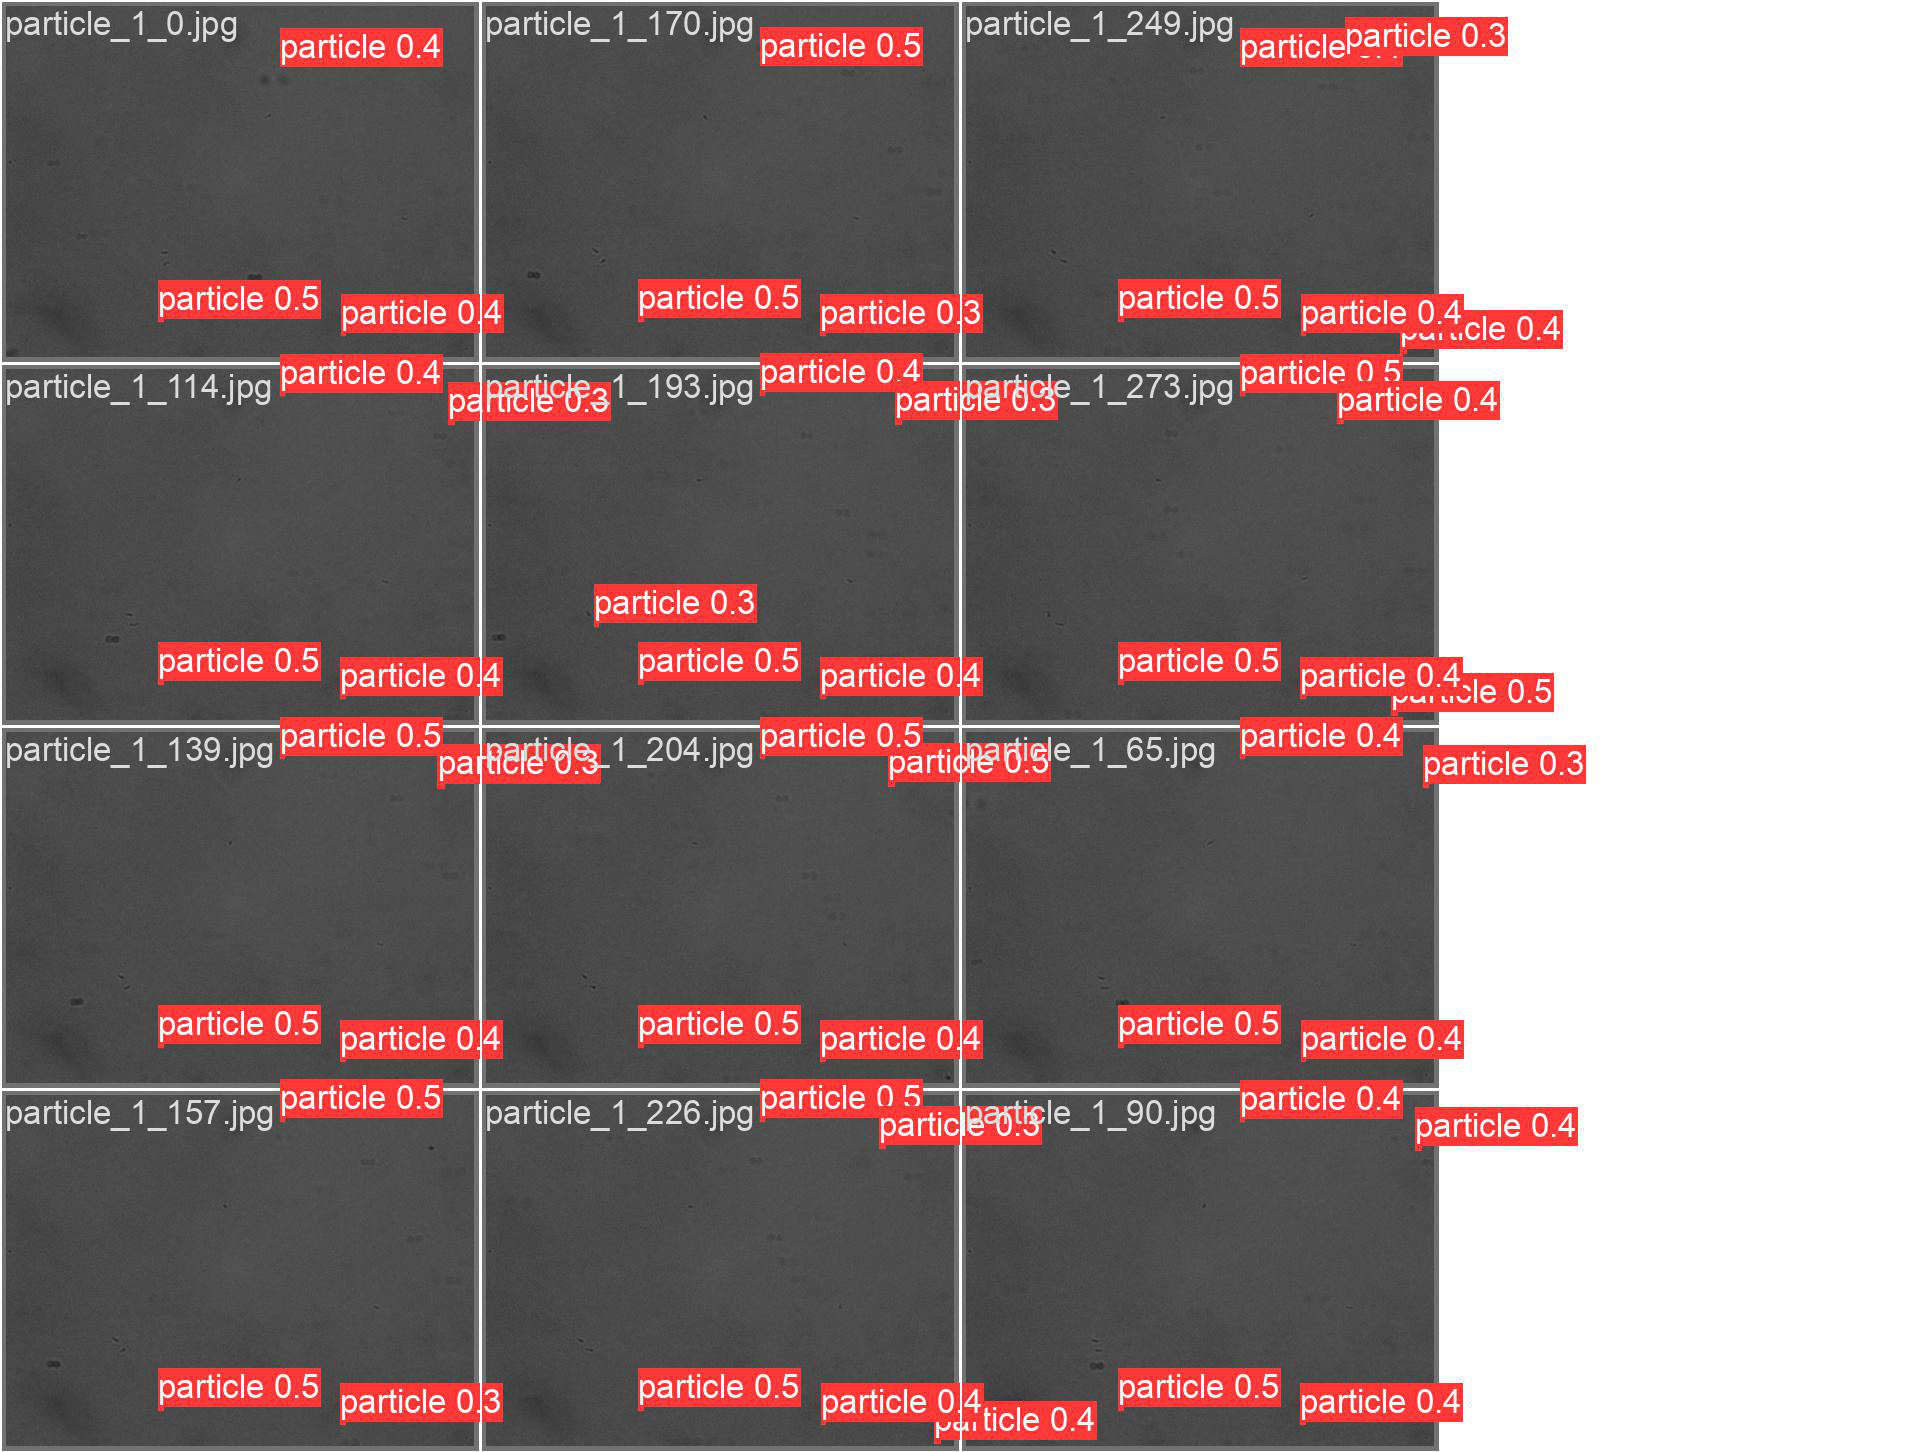

In [ ]:
img2.show()

In [ ]:
img3 = Image.open('/content/runs/detect/val2/val_batch0_pred.jpg')

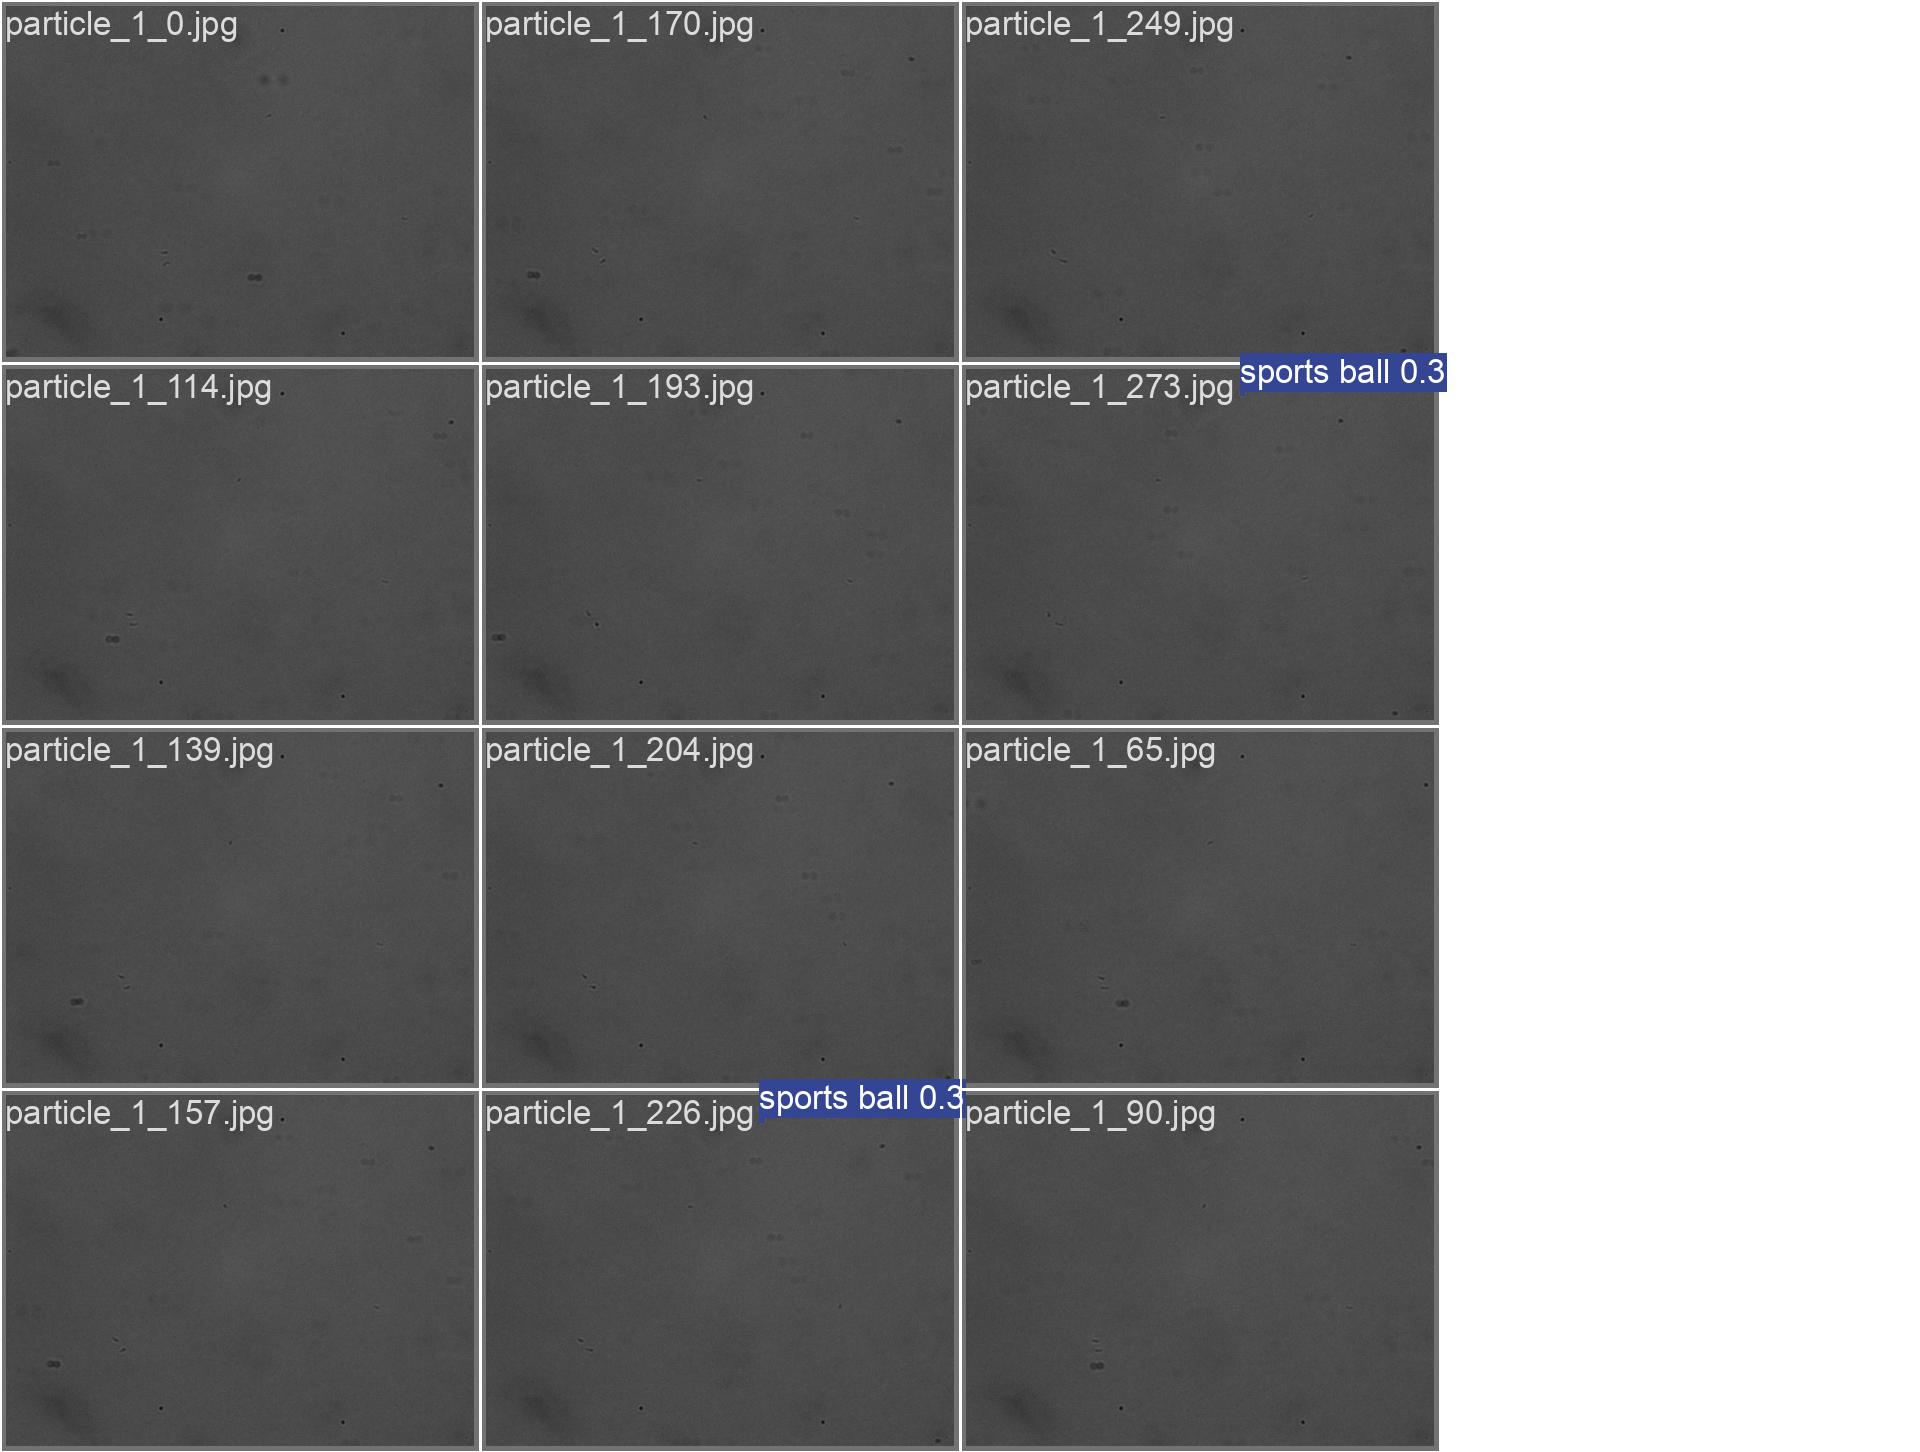

In [ ]:
img3.show()